In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

import re
import argparse
import logging

# import os
# import glob
import sys
from pathlib import Path

In [2]:
pd.set_option('display.max_columns', None)

In [7]:
machine = 'mixr'
if machine == 'laptop':
    # laptop directory
    directory = 'C:\\Users\\watson\\Documents\\GitHub\\SabberStone-master\\Sabber_Work_2019F\\thesis-output\\Z1vsZ2\\'
elif machine == 'desktop':
    # desktop directory
    # directory = 'C:\\Users\\watson\\Documents\\SabberStone 2019\\Sabber_Work_2019F\\thesis-output\\Z1vsZ2\\'
    directory = 'C:\\Users\\watson\\Documents\\SabberStone 2019\\Sabber_Work_2019F\\thesis-output\\Z1vsZ2Kong\\test_one\\'
elif machine == 'kong':
    directory = 'blah'
elif machine == 'mixr':
    directory = 'C:\\Users\\Main\\Documents\\GitHub\\Sabber_Work_2019F\\thesis-output\\Z1vsZ2'
elif machine == 'mixr2':
    directory = 'C:\\Users\\Main\\Documents\\GitHub\\Sabber_Work_2019F\\thesis-output\\{}'

In [8]:
directory

'C:\\Users\\Main\\Documents\\GitHub\\Sabber_Work_2019F\\thesis-output\\Z1vsZ2'

In [9]:
games = []
pathlist = Path(directory).glob('**\\*.txt')
filepaths = {}
for path in pathlist:
    #print('__________________________________________________________________')
    # because path is object not string
    game_name = str(path)
    game_csv_name = game_name.replace('.txt', '.csv')
    game_plot_name = game_name.replace('.txt', '.png')
    #print(game_name)
    #print(game_csv_name)
    #print(game_plot_name)
    parts = str(path).split('\\')
    game_id = parts[-1]
    filepaths[game_id] = game_name
    with open(game_csv_name) as f:
        df = pd.read_csv(f, index_col=0)
        id_col = [game_id for row in range(df.shape[0])]
        df.insert(0, "GAME_ID", game_id)
        games.append(df)
    #game_obj = GameFilter(game_name)
    #game_obj.parse_file(game_csv_name)
    #logging.info('Number of turns: {}'.format(len(game_obj.end_of_turn_data)))
    #game_obj.plot_data(game_plot_name)
len(games)

20

In [6]:
# filepaths['game04.txt']
filepaths['Z1vsZ2Logs1.txt']

'C:\\Users\\watson\\Documents\\SabberStone 2019\\Sabber_Work_2019F\\thesis-output\\Z1vsZ2Kong\\test_one\\Z1vsZ2Logs1.txt'

In [11]:
games_df = pd.concat(games)
games_df.reset_index(drop=True, inplace=True)
games_df.head(15)

,GAME_ID,TURN_NO,P1_HEALTH,P2_HEALTH,CURRENT_PLAYER,AMOUNTHEALEDTHISTURN,NUMATTACKSTHISTURN,NUMCARDSDRAWNTHISTURN,NUMCARDSPLAYEDTHISTURN,NUMCARDSTODRAW,NUMELEMENTALSPLAYEDLASTTURN,NUMELEMENTALSPLAYEDTHISTURN,NUMFRIENDLYMINIONSTHATATTACKEDTHISTURN,NUMFRIENDLYMINIONSTHATDIEDTHISTURN,NUMMINIONSPLAYEDTHISTURN,NUMMINIONSPLAYERKILLEDTHISTURN,NUMOPTIONSPLAYEDTHISTURN,NUMSECRETSPLAYEDTHISGAME,NUMSPELLSPLAYEDTHISGAME,NUMTIMESHEROPOWERUSEDTHISGAME,REMAININGMANA,TOTALMANASPENTTHISGAME,USEDMANATHISTURN
0,Z1vsZ2Logs1.txt,1,30,30,P1 FitzVonGerald,0,0,1,1,0,0,0,0,0,1,0,2,0,0,0,0,1,1
1,Z1vsZ2Logs1.txt,2,30,30,P2 RehHausZuckFuchs,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,1,1
2,Z1vsZ2Logs1.txt,3,30,29,P1 FitzVonGerald,0,0,1,1,0,0,0,1,0,1,0,2,0,0,0,1,2,1
3,Z1vsZ2Logs1.txt,4,27,29,P2 RehHausZuckFuchs,0,0,1,3,0,0,0,2,0,2,0,5,0,1,0,0,4,2
4,Z1vsZ2Logs1.txt,5,27,24,P1 FitzVonGerald,0,0,1,1,0,0,0,3,0,1,0,4,0,0,0,0,5,3
5,Z1vsZ2Logs1.txt,6,21,24,P2 RehHausZuckFuchs,0,0,1,1,0,0,0,4,0,1,0,5,0,1,0,2,5,1
6,Z1vsZ2Logs1.txt,7,21,16,P1 FitzVonGerald,0,0,1,1,0,0,0,4,0,1,0,5,0,0,0,0,9,4
7,Z1vsZ2Logs1.txt,8,8,16,P2 RehHausZuckFuchs,0,0,1,1,0,0,0,5,0,1,0,6,0,1,0,1,8,3
8,Z1vsZ2Logs10.txt,1,30,30,P1 FitzVonGerald,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,1,1
9,Z1vsZ2Logs10.txt,2,27,30,P2 RehHausZuckFuchs,0,0,1,3,0,0,0,1,0,2,0,5,0,1,0,0,2,1


In [12]:
games_df.isnull().any()

GAME_ID                                   False
TURN_NO                                   False
P1_HEALTH                                 False
P2_HEALTH                                 False
CURRENT_PLAYER                            False
AMOUNTHEALEDTHISTURN                      False
NUMATTACKSTHISTURN                        False
NUMCARDSDRAWNTHISTURN                     False
NUMCARDSPLAYEDTHISTURN                    False
NUMCARDSTODRAW                            False
NUMELEMENTALSPLAYEDLASTTURN               False
NUMELEMENTALSPLAYEDTHISTURN               False
NUMFRIENDLYMINIONSTHATATTACKEDTHISTURN    False
NUMFRIENDLYMINIONSTHATDIEDTHISTURN        False
NUMMINIONSPLAYEDTHISTURN                  False
NUMMINIONSPLAYERKILLEDTHISTURN            False
NUMOPTIONSPLAYEDTHISTURN                  False
NUMSECRETSPLAYEDTHISGAME                  False
NUMSPELLSPLAYEDTHISGAME                   False
NUMTIMESHEROPOWERUSEDTHISGAME             False
REMAININGMANA                           

## Some rows have RemainingMana == -1, which makes no sense.

### Minimum E.O.T. mana for any player should be 0.

In [19]:
games_df.loc[(games_df['REMAININGMANA']<0)]

,GAME_ID,TURN_NO,P1_HEALTH,P2_HEALTH,CURRENT_PLAYER,AMOUNTHEALEDTHISTURN,NUMATTACKSTHISTURN,NUMCARDSDRAWNTHISTURN,NUMCARDSPLAYEDTHISTURN,NUMCARDSTODRAW,NUMELEMENTALSPLAYEDLASTTURN,NUMELEMENTALSPLAYEDTHISTURN,NUMFRIENDLYMINIONSTHATATTACKEDTHISTURN,NUMFRIENDLYMINIONSTHATDIEDTHISTURN,NUMMINIONSPLAYEDTHISTURN,NUMMINIONSPLAYERKILLEDTHISTURN,NUMOPTIONSPLAYEDTHISTURN,NUMSECRETSPLAYEDTHISGAME,NUMSPELLSPLAYEDTHISGAME,NUMTIMESHEROPOWERUSEDTHISGAME,REMAININGMANA,TOTALMANASPENTTHISGAME,USEDMANATHISTURN


In [13]:
games_df[30:34][['GAME_ID','TURN_NO', 'P1_HEALTH', 'P2_HEALTH', 'CURRENT_PLAYER', 'REMAININGMANA']]

,GAME_ID,TURN_NO,P1_HEALTH,P2_HEALTH,CURRENT_PLAYER,REMAININGMANA
30,Z1vsZ2Logs101.txt,7,16,11,P1 FitzVonGerald,0
31,Z1vsZ2Logs101.txt,8,0,11,P2 RehHausZuckFuchs,0
32,Z1vsZ2Logs102.txt,1,30,30,P1 FitzVonGerald,1
33,Z1vsZ2Logs102.txt,2,30,30,P2 RehHausZuckFuchs,0


In [27]:
flag = False
savedLines = []
with open(filepaths['game04.txt']) as f:
    lines = f.readlines()
    for line in lines:
        if 'turn no 8' in line:
            flag = True
        if flag:
            savedLines.append(line)
        if flag and line[0] == '_' and line[-2] == '|':
            break
savedLines

['Player1: PLAYING / Player2: PLAYING - turn no 8\n',
 'Hero[P1]: 14 / Hero[P2]: 26\n',
 '>>>>>>>>>TASK TYPE CHECK (is EOT?): True\n',
 '>>>>>>>>>TASK TYPE: END_TURN\n',
 'ALL TURN TASKS:\n',
 "PlayCardTask => [Viper] play 'Magic Carpet[61]'(MINION) to Pos[0] Option -1\n",
 "MinionAttackTask => [Viper] 'Knife Juggler[57]'(MINION) attack 'Gul'dan[4]'\n",
 "MinionAttackTask => [Viper] 'Mecharoo[54]'(MINION) attack 'Imp[70]'\n",
 "PlayCardTask => [Viper] play 'Sea Giant[67]'(MINION) to Pos[3] Option -1\n",
 "MinionAttackTask => [Viper] 'Abusive Sergeant[49]'(MINION) attack 'Gul'dan[4]'\n",
 "MinionAttackTask => [Viper] 'Voidwalker[44]'(MINION) attack 'Gul'dan[4]'\n",
 'EndTurnTask => [Viper]\n',
 '\n',
 'CURRENT PLAYER: P2 Viper\n',
 'AMOUNTHEALEDTHISTURN 0\n',
 'HEROPOWERACTIVATIONSTHIS TURN 0\n',
 'NUMATTACKSTHISTURN 0\n',
 'NUMCARDSDRAWNTHISTURN 1\n',
 'NUMCARDSPLAYEDTHISTURN 2\n',
 'NUMCARDSTODRAW 0\n',
 'NUMELEMENTALSPLAYEDLASTTURN 0\n',
 'NUMELEMENTALSPLAYEDTHISTURN 0\n',
 'NUMFRIEN

### As we can see at turn number 8, the Remaining Mana for Viper is -1. Should be fixed in the data processing.

### Let's verify with game16 as well:

In [23]:
games_df[149:155][['GAME_ID','TURN_NO', 'P1_HEALTH', 'P2_HEALTH', 'CURRENT_PLAYER', 'REMAININGMANA']]

,GAME_ID,TURN_NO,P1_HEALTH,P2_HEALTH,CURRENT_PLAYER,REMAININGMANA
149,game16.txt,6,29,23,P2 Viper,0.0
150,game16.txt,7,29,18,P1 Roffle,2.0
151,game16.txt,8,25,18,P2 Viper,0.0
152,game16.txt,9,25,18,P1 Roffle,1.0
153,game16.txt,10,20,18,P2 Viper,NaN
154,game16.txt,11,20,18,P1 Roffle,2.0


In [26]:
flag = False
savedLines = []
with open(filepaths['game16.txt']) as f:
    lines = f.readlines()
    for line in lines:
        if 'turn no 10' in line:
            flag = True
        if flag:
            savedLines.append(line)
        if flag and line[0] == '_' and line[-2] == '|':
            break
savedLines

['Player1: PLAYING / Player2: PLAYING - turn no 10\n',
 'Hero[P1]: 20 / Hero[P2]: 18\n',
 '>>>>>>>>>TASK TYPE CHECK (is EOT?): True\n',
 '>>>>>>>>>TASK TYPE: END_TURN\n',
 'ALL TURN TASKS:\n',
 "MinionAttackTask => [Viper] 'Defender of Argus[65]'(MINION) attack 'Gul'dan[4]'\n",
 "MinionAttackTask => [Viper] 'Microbot[71]'(MINION) attack 'Gul'dan[4]'\n",
 "PlayCardTask => [Viper] play 'Knife Juggler[58]'(MINION) to Pos[0] Option -1\n",
 "PlayCardTask => [Viper] play 'Voidwalker[43]'(MINION) to Pos[2] Option -1\n",
 "PlayCardTask => [Viper] play 'Sea Giant[66]'(MINION) to Pos[3] Option -1\n",
 'EndTurnTask => [Viper]\n',
 '\n',
 'CURRENT PLAYER: P2 Viper\n',
 'AMOUNTHEALEDTHISTURN 0\n',
 'HEROPOWERACTIVATIONSTHIS TURN 0\n',
 'NUMATTACKSTHISTURN 0\n',
 'NUMCARDSDRAWNTHISTURN 1\n',
 'NUMCARDSPLAYEDTHISTURN 3\n',
 'NUMCARDSTODRAW 0\n',
 'NUMELEMENTALSPLAYEDLASTTURN 0\n',
 'NUMELEMENTALSPLAYEDTHISTURN 0\n',
 'NUMFRIENDLYMINIONSTHATATTACKEDTHISTURN 2\n',
 'NUMFRIENDLYMINIONSTHATDIEDTHISTURN 0

### In game16 at turn 10, we see Viper again with -1 RemainingMana

## Change the values where RemainingMana equals -1 into 0.

In [36]:
games_df.loc[(games_df['REMAININGMANA']==-1)]

,GAME_ID,TURN_NO,P1_HEALTH,P2_HEALTH,CURRENT_PLAYER,AMOUNTHEALEDTHISTURN,NUMATTACKSTHISTURN,NUMCARDSDRAWNTHISTURN,NUMCARDSPLAYEDTHISTURN,NUMCARDSTODRAW,...,NUMFRIENDLYMINIONSTHATDIEDTHISTURN,NUMMINIONSPLAYEDTHISTURN,NUMMINIONSPLAYERKILLEDTHISTURN,NUMOPTIONSPLAYEDTHISTURN,NUMSECRETSPLAYEDTHISGAME,NUMSPELLSPLAYEDTHISGAME,NUMTIMESHEROPOWERUSEDTHISGAME,REMAININGMANA,TOTALMANASPENTTHISGAME,USEDMANATHISTURN
32,game04.txt,8,14,26,P2 Viper,0,0,1,2,0,...,1,2,3,6,0,1,0,-1,12,5
153,game16.txt,10,20,18,P2 Viper,0,0,1,3,0,...,0,3,1,5,0,1,0,-1,16,6


In [37]:
games_df['REMAININGMANA'].replace(-1, 0, inplace=True)

In [38]:
games_df.loc[(games_df['REMAININGMANA']==-1)]

,GAME_ID,TURN_NO,P1_HEALTH,P2_HEALTH,CURRENT_PLAYER,AMOUNTHEALEDTHISTURN,NUMATTACKSTHISTURN,NUMCARDSDRAWNTHISTURN,NUMCARDSPLAYEDTHISTURN,NUMCARDSTODRAW,...,NUMFRIENDLYMINIONSTHATDIEDTHISTURN,NUMMINIONSPLAYEDTHISTURN,NUMMINIONSPLAYERKILLEDTHISTURN,NUMOPTIONSPLAYEDTHISTURN,NUMSECRETSPLAYEDTHISGAME,NUMSPELLSPLAYEDTHISGAME,NUMTIMESHEROPOWERUSEDTHISGAME,REMAININGMANA,TOTALMANASPENTTHISGAME,USEDMANATHISTURN


In [20]:
games_df.head()

,GAME_ID,TURN_NO,P1_HEALTH,P2_HEALTH,CURRENT_PLAYER,AMOUNTHEALEDTHISTURN,NUMATTACKSTHISTURN,NUMCARDSDRAWNTHISTURN,NUMCARDSPLAYEDTHISTURN,NUMCARDSTODRAW,NUMELEMENTALSPLAYEDLASTTURN,NUMELEMENTALSPLAYEDTHISTURN,NUMFRIENDLYMINIONSTHATATTACKEDTHISTURN,NUMFRIENDLYMINIONSTHATDIEDTHISTURN,NUMMINIONSPLAYEDTHISTURN,NUMMINIONSPLAYERKILLEDTHISTURN,NUMOPTIONSPLAYEDTHISTURN,NUMSECRETSPLAYEDTHISGAME,NUMSPELLSPLAYEDTHISGAME,NUMTIMESHEROPOWERUSEDTHISGAME,REMAININGMANA,TOTALMANASPENTTHISGAME,USEDMANATHISTURN
0,Z1vsZ2Logs1.txt,1,30,30,P1 FitzVonGerald,0,0,1,1,0,0,0,0,0,1,0,2,0,0,0,0,1,1
1,Z1vsZ2Logs1.txt,2,30,30,P2 RehHausZuckFuchs,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,1,1
2,Z1vsZ2Logs1.txt,3,30,29,P1 FitzVonGerald,0,0,1,1,0,0,0,1,0,1,0,2,0,0,0,1,2,1
3,Z1vsZ2Logs1.txt,4,27,29,P2 RehHausZuckFuchs,0,0,1,3,0,0,0,2,0,2,0,5,0,1,0,0,4,2
4,Z1vsZ2Logs1.txt,5,27,24,P1 FitzVonGerald,0,0,1,1,0,0,0,3,0,1,0,4,0,0,0,0,5,3


In [27]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
X = games_df.select_dtypes(include=numerics)

In [28]:
print(X.shape)
X.head(20)

(4630, 21)


,TURN_NO,P1_HEALTH,P2_HEALTH,AMOUNTHEALEDTHISTURN,NUMATTACKSTHISTURN,NUMCARDSDRAWNTHISTURN,NUMCARDSPLAYEDTHISTURN,NUMCARDSTODRAW,NUMELEMENTALSPLAYEDLASTTURN,NUMELEMENTALSPLAYEDTHISTURN,NUMFRIENDLYMINIONSTHATATTACKEDTHISTURN,NUMFRIENDLYMINIONSTHATDIEDTHISTURN,NUMMINIONSPLAYEDTHISTURN,NUMMINIONSPLAYERKILLEDTHISTURN,NUMOPTIONSPLAYEDTHISTURN,NUMSECRETSPLAYEDTHISGAME,NUMSPELLSPLAYEDTHISGAME,NUMTIMESHEROPOWERUSEDTHISGAME,REMAININGMANA,TOTALMANASPENTTHISGAME,USEDMANATHISTURN
0,1,30,30,0,0,1,1,0,0,0,0,0,1,0,2,0,0,0,0,1,1
1,2,30,30,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,1,1
2,3,30,29,0,0,1,1,0,0,0,1,0,1,0,2,0,0,0,1,2,1
3,4,27,29,0,0,1,3,0,0,0,2,0,2,0,5,0,1,0,0,4,2
4,5,27,24,0,0,1,1,0,0,0,3,0,1,0,4,0,0,0,0,5,3
5,6,21,24,0,0,1,1,0,0,0,4,0,1,0,5,0,1,0,2,5,1
6,7,21,16,0,0,1,1,0,0,0,4,0,1,0,5,0,0,0,0,9,4
7,8,8,16,0,0,1,1,0,0,0,5,0,1,0,6,0,1,0,1,8,3
8,1,30,30,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,1,1
9,2,27,30,0,0,1,3,0,0,0,1,0,2,0,5,0,1,0,0,2,1


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

In [50]:
# Split ALL columns
(X_train, X_test) = train_test_split(numeric_cols, test_size=0.30)

In [51]:
print(X_train.shape)
print(X_test.shape)

(3241, 21)
(1389, 21)


In [52]:
cols_to_cluster = ['P1_HEALTH', 'P2_HEALTH', 'NUMFRIENDLYMINIONSTHATATTACKEDTHISTURN', 'USEDMANATHISTURN']

In [66]:
# Create the KMeans object
kmeans = KMeans(n_clusters=7, n_init=3, max_iter=500, random_state=1)

In [67]:
# Cluster using SOME columns
kmeans = kmeans.fit(X_train[cols_to_cluster])

In [55]:
# Save the labels (if there are any, but there aren't)
# X_train.loc[:,'labels'] = kmeans.labels_

In [68]:
centers = np.array(kmeans.cluster_centers_)

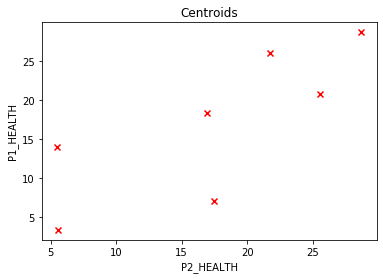

In [69]:
plt.title('Centroids')
plt.ylabel('P1_HEALTH')
plt.xlabel('P2_HEALTH')
plt.scatter(centers[:,0], centers[:,1], marker="x", color='r')
plt.show()

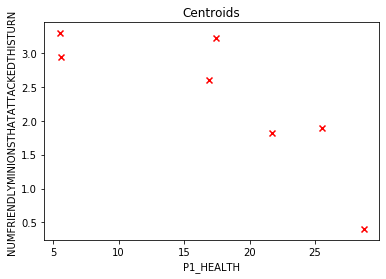

In [70]:
plt.title('Centroids')
plt.ylabel('NUMFRIENDLYMINIONSTHATATTACKEDTHISTURN')
plt.xlabel('P1_HEALTH')
plt.scatter(centers[:,0], centers[:,2], marker="x", color='r')
plt.show()

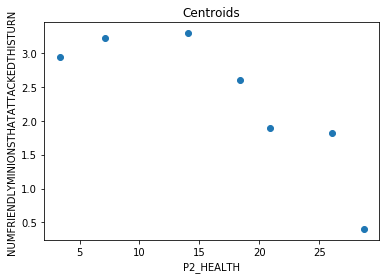

In [71]:
plt.title('Centroids')
plt.ylabel('NUMFRIENDLYMINIONSTHATATTACKEDTHISTURN')
plt.xlabel('P2_HEALTH')
plt.scatter(centers[:,1], centers[:,2]) # , marker="x", color='r')
plt.show()

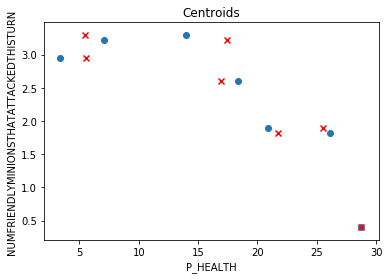

In [72]:
plt.title('Centroids')
plt.ylabel('NUMFRIENDLYMINIONSTHATATTACKEDTHISTURN')
plt.xlabel('P_HEALTH')
plt.scatter(centers[:,1], centers[:,2]) # , marker="x", color='r')
plt.scatter(centers[:,0], centers[:,2], marker="x", color='r')
plt.show()

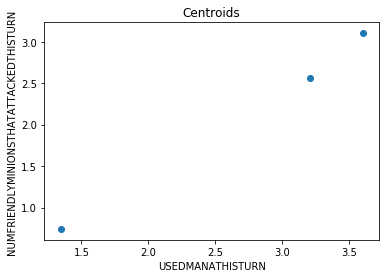

In [62]:
plt.title('Centroids')
plt.ylabel('NUMFRIENDLYMINIONSTHATATTACKEDTHISTURN')
plt.xlabel('USEDMANATHISTURN')
plt.scatter(centers[:,3], centers[:,2]) # , marker="x", color='r')
plt.show()

In [63]:
games_df.loc[(games_df['P1_HEALTH'].isin(list(range(25, 30))))]

,GAME_ID,TURN_NO,P1_HEALTH,P2_HEALTH,CURRENT_PLAYER,AMOUNTHEALEDTHISTURN,NUMATTACKSTHISTURN,NUMCARDSDRAWNTHISTURN,NUMCARDSPLAYEDTHISTURN,NUMCARDSTODRAW,NUMELEMENTALSPLAYEDLASTTURN,NUMELEMENTALSPLAYEDTHISTURN,NUMFRIENDLYMINIONSTHATATTACKEDTHISTURN,NUMFRIENDLYMINIONSTHATDIEDTHISTURN,NUMMINIONSPLAYEDTHISTURN,NUMMINIONSPLAYERKILLEDTHISTURN,NUMOPTIONSPLAYEDTHISTURN,NUMSECRETSPLAYEDTHISGAME,NUMSPELLSPLAYEDTHISGAME,NUMTIMESHEROPOWERUSEDTHISGAME,REMAININGMANA,TOTALMANASPENTTHISGAME,USEDMANATHISTURN
3,Z1vsZ2Logs1.txt,4,27,29,P2 RehHausZuckFuchs,0,0,1,3,0,0,0,2,0,2,0,5,0,1,0,0,4,2
4,Z1vsZ2Logs1.txt,5,27,24,P1 FitzVonGerald,0,0,1,1,0,0,0,3,0,1,0,4,0,0,0,0,5,3
9,Z1vsZ2Logs10.txt,2,27,30,P2 RehHausZuckFuchs,0,0,1,3,0,0,0,1,0,2,0,5,0,1,0,0,2,1
10,Z1vsZ2Logs10.txt,3,27,29,P1 FitzVonGerald,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,2,1,0
17,Z1vsZ2Logs100.txt,2,28,30,P2 RehHausZuckFuchs,0,0,1,3,0,0,0,0,0,1,0,4,0,2,0,0,2,1
18,Z1vsZ2Logs100.txt,3,28,25,P1 FitzVonGerald,0,0,1,1,0,0,0,2,0,0,0,4,0,1,0,1,2,1
27,Z1vsZ2Logs101.txt,4,25,27,P2 RehHausZuckFuchs,0,0,1,1,0,0,0,2,0,1,0,4,0,0,0,1,2,1
28,Z1vsZ2Logs101.txt,5,25,21,P1 FitzVonGerald,0,0,1,1,0,0,0,2,0,0,0,4,0,0,0,0,4,3
35,Z1vsZ2Logs102.txt,4,27,26,P2 RehHausZuckFuchs,0,0,1,0,0,0,0,2,0,0,0,2,0,1,0,2,2,0
36,Z1vsZ2Logs102.txt,5,27,23,P1 FitzVonGerald,0,0,1,1,0,0,0,0,0,0,0,2,0,1,0,0,5,3


In [64]:
games_df.loc[(games_df['P1_HEALTH'].isin(list(range(0, 10))))]

,GAME_ID,TURN_NO,P1_HEALTH,P2_HEALTH,CURRENT_PLAYER,AMOUNTHEALEDTHISTURN,NUMATTACKSTHISTURN,NUMCARDSDRAWNTHISTURN,NUMCARDSPLAYEDTHISTURN,NUMCARDSTODRAW,NUMELEMENTALSPLAYEDLASTTURN,NUMELEMENTALSPLAYEDTHISTURN,NUMFRIENDLYMINIONSTHATATTACKEDTHISTURN,NUMFRIENDLYMINIONSTHATDIEDTHISTURN,NUMMINIONSPLAYEDTHISTURN,NUMMINIONSPLAYERKILLEDTHISTURN,NUMOPTIONSPLAYEDTHISTURN,NUMSECRETSPLAYEDTHISGAME,NUMSPELLSPLAYEDTHISGAME,NUMTIMESHEROPOWERUSEDTHISGAME,REMAININGMANA,TOTALMANASPENTTHISGAME,USEDMANATHISTURN
7,Z1vsZ2Logs1.txt,8,8,16,P2 RehHausZuckFuchs,0,0,1,1,0,0,0,5,0,1,0,6,0,1,0,1,8,3
15,Z1vsZ2Logs10.txt,8,0,20,P2 RehHausZuckFuchs,0,0,1,1,0,0,0,5,0,1,0,6,0,1,0,0,9,4
23,Z1vsZ2Logs100.txt,8,0,9,P2 RehHausZuckFuchs,0,0,1,1,0,0,0,4,0,1,0,6,0,2,0,0,10,4
31,Z1vsZ2Logs101.txt,8,0,11,P2 RehHausZuckFuchs,0,0,1,2,0,0,0,4,0,0,0,7,0,1,0,0,10,4
41,Z1vsZ2Logs102.txt,10,2,13,P2 RehHausZuckFuchs,0,0,1,1,0,0,0,2,0,0,0,4,0,3,0,0,13,5
42,Z1vsZ2Logs102.txt,11,2,3,P1 FitzVonGerald,0,0,1,2,0,0,0,2,0,2,0,5,0,1,3,0,20,6
43,Z1vsZ2Logs102.txt,12,0,3,P2 RehHausZuckFuchs,0,0,1,0,0,0,0,1,0,0,0,1,0,3,0,6,13,0
53,Z1vsZ2Logs103.txt,10,9,14,P2 RehHausZuckFuchs,0,0,1,1,0,0,0,5,2,1,3,7,0,1,0,1,10,4
54,Z1vsZ2Logs103.txt,11,9,4,P1 FitzVonGerald,0,0,1,2,0,0,0,1,0,2,0,4,0,1,0,0,19,6
55,Z1vsZ2Logs103.txt,12,0,4,P2 RehHausZuckFuchs,0,0,1,0,0,0,0,3,0,0,0,3,0,1,0,6,10,0


In [41]:
from sklearn.preprocessing import StandardScaler
# features = ['sepal length', 'sepal width', 'petal length', 'petal width']
# Separating out the features
# x = df.loc[:, features].values
# Separating out the target
# y = df.loc[:,['target']].values
# Standardizing the features
x = StandardScaler().fit_transform(numeric_cols)
xdf = pd.DataFrame(x, columns = numeric_cols.columns)

In [42]:
xdf.shape

(196, 21)

In [43]:
xdf.head()

,TURN_NO,P1_HEALTH,P2_HEALTH,AMOUNTHEALEDTHISTURN,NUMATTACKSTHISTURN,NUMCARDSDRAWNTHISTURN,NUMCARDSPLAYEDTHISTURN,NUMCARDSTODRAW,NUMELEMENTALSPLAYEDLASTTURN,NUMELEMENTALSPLAYEDTHISTURN,...,NUMFRIENDLYMINIONSTHATDIEDTHISTURN,NUMMINIONSPLAYEDTHISTURN,NUMMINIONSPLAYERKILLEDTHISTURN,NUMOPTIONSPLAYEDTHISTURN,NUMSECRETSPLAYEDTHISGAME,NUMSPELLSPLAYEDTHISGAME,NUMTIMESHEROPOWERUSEDTHISGAME,REMAININGMANA,TOTALMANASPENTTHISGAME,USEDMANATHISTURN
0,-1.492152,0.812950,1.047238,0.0,0.0,-0.188857,-0.628342,0.0,0.0,0.0,...,-0.480261,-0.073458,-0.551942,-1.246908,0.0,-1.320328,-0.219382,-0.579284,-1.197500,-0.915734
1,-1.162432,0.812950,1.047238,0.0,0.0,-0.188857,-0.628342,0.0,0.0,0.0,...,-0.480261,-0.073458,-0.551942,-1.246908,0.0,-1.320328,-0.219382,-0.579284,-1.197500,-0.915734
2,-0.832712,0.812950,0.608963,0.0,0.0,-0.188857,0.740047,0.0,0.0,0.0,...,-0.480261,1.526289,-0.551942,-0.128400,0.0,-1.320328,-0.219382,-0.579284,-0.732728,-0.192009
3,-0.502992,0.678488,0.608963,0.0,0.0,-0.188857,0.740047,0.0,0.0,0.0,...,-0.480261,-0.073458,-0.551942,-0.128400,0.0,-0.259737,-0.219382,-0.579284,-0.500341,-0.192009
4,-0.173271,0.678488,-0.267586,0.0,0.0,-0.188857,0.740047,0.0,0.0,0.0,...,1.088592,-0.073458,0.405409,0.990108,0.0,-0.259737,-0.219382,-0.579284,-0.035569,0.531717


In [44]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [46]:
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [47]:
principalDf

,principal component 1,principal component 2
0,-3.387758,-0.290143
1,-3.263776,-0.314780
2,-1.858571,1.396290
3,-1.386476,0.781319
4,0.619263,0.579218
5,0.846476,-0.281776
6,2.303941,-1.762577
7,-3.387758,-0.290143
8,-3.263776,-0.314780
9,-1.792389,0.823028
